Data Preprocessing

Описание дынных. Исходный датасет имеет 10 переменных.9 первых переменных - это независимые. Последняя переменная "Price" - зависимая переменная. Из независимых переменных у нас имеется три числовых и 5 текстовых. Переменная "Price" состоит из числовых показателей. Конвертируем наш документ в формат csv с разделителем "запятая". Осуществим подготовку данных, импортировав необходимые библиотеки.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузим наш предварительно конвертированный файл.

In [2]:
# Importing the dataset
df = pd.read_csv('vehicleprice.csv', sep=',')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 9 колонок и 1940 строк.

In [3]:
df

,brand,model,year,body,car_mileage,fuel,power,transmission,price
0,ford,transit,2006.0,other,220.0,diesel,2.0,manual,5350.0
1,renault,master,2017.0,other,211.0,diesel,2.3,manual,17000.0
2,opel,vivaro,2015.0,other,157.0,diesel,1.6,manual,15200.0
3,ford,transit,2000.0,other,300.0,diesel,2.4,manual,4999.0
4,volkswagen,t4,2002.0,other,270.0,diesel,2.5,manual,12900.0
...,...,...,...,...,...,...,...,...,...
1935,renault,laguna,2005.0,liftback,311.0,diesel,1.9,manual,5400.0
1936,skoda,octavia,2009.0,liftback,201.0,diesel,2.0,manual,8500.0
1937,audi,a5,2012.0,liftback,199.0,petrol,1.8,automatic,16500.0
1938,skoda,octavia,2008.0,liftback,226.0,gas,1.6,manual,7199.0


Для определения пропущенных значений в переменных выведем общее количество и процент пропусков по переменным. 

In [4]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
price,0,0.0
transmission,0,0.0
power,0,0.0
fuel,0,0.0
car_mileage,0,0.0
body,0,0.0
year,0,0.0
model,0,0.0
brand,0,0.0


Как видим, пропущенных занчений нет

Проведем проверку типов данных по переменным и выявим соответствие.

In [5]:
df.dtypes

brand            object
model            object
year            float64
body             object
car_mileage     float64
fuel             object
power           float64
transmission     object
price           float64
dtype: object

Выведем статистику по числовым значениям. Как и следовало ожидать - пропущенных значений нет. 

In [6]:
df.describe()

,year,car_mileage,power,price
count,1940.000000,1940.000000,1940.000000,1940.000000
mean,2009.478866,153.680928,2.268093,14696.400000
std,6.061918,88.726209,0.919620,14328.528943
min,1984.000000,2.000000,0.600000,550.000000
25%,2007.000000,86.000000,1.600000,6515.000000
50%,2011.000000,149.000000,2.000000,10625.000000
75%,2014.000000,203.000000,2.500000,17222.500000
max,2019.000000,613.000000,6.600000,149900.000000


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


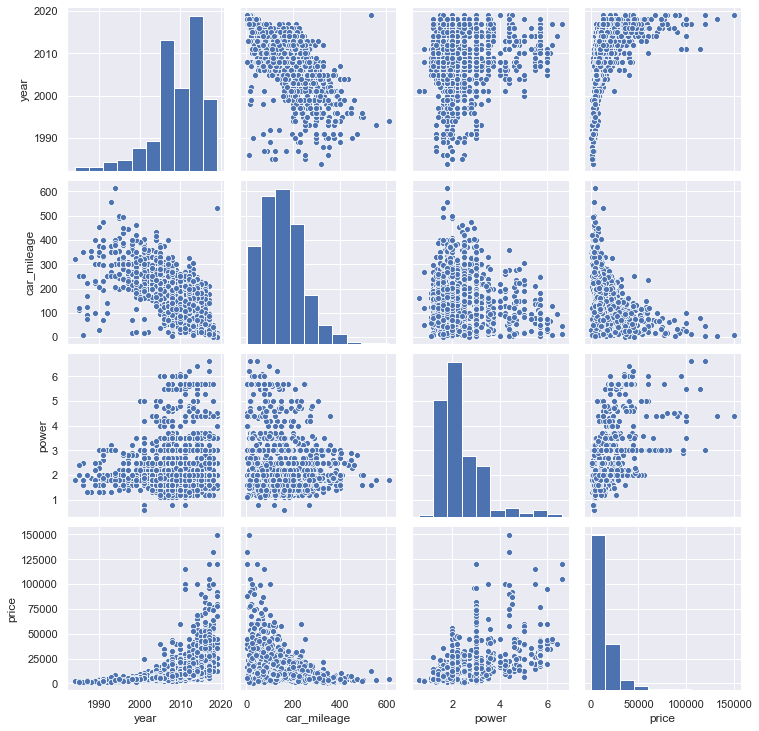

In [7]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

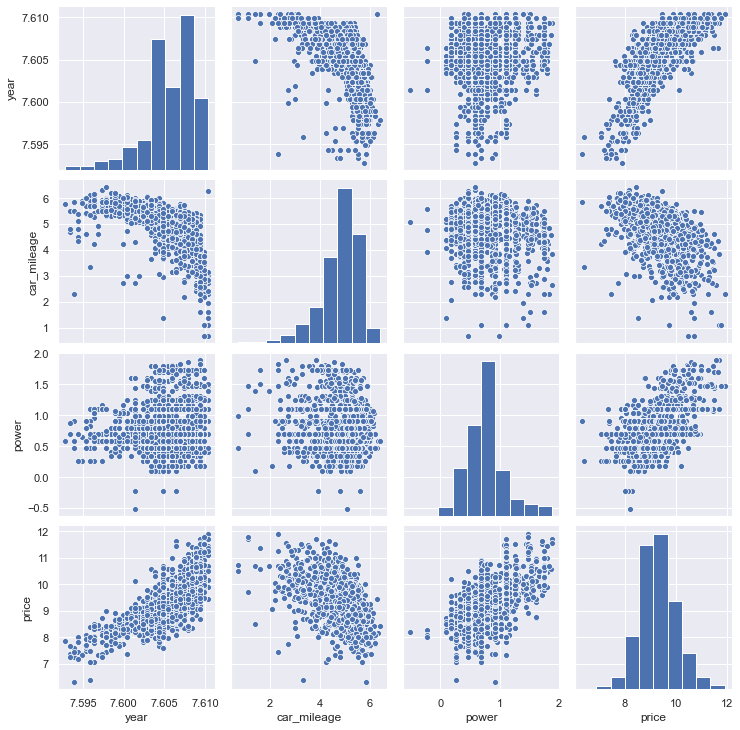

In [8]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['year','car_mileage','power','price']] = np.log(df_1[['year','car_mileage','power','price']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

В нашем датасете присутствуют качественные переменные. Их необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [10]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [11]:
# Encoding categorical data
df = encoding_char(df)

Посмотрим, как будут выглядеть наши закодированные данные. Теперь все переменные в ней являются числовыми. 
С ними можно теперь работать.

In [12]:
df

,brand,model,year,body,car_mileage,fuel,power,transmission,price
0,0,0,2006.0,0,220.0,0,2.0,0,5350.0
1,1,1,2017.0,0,211.0,0,2.3,0,17000.0
2,2,2,2015.0,0,157.0,0,1.6,0,15200.0
3,0,0,2000.0,0,300.0,0,2.4,0,4999.0
4,3,3,2002.0,0,270.0,0,2.5,0,12900.0
...,...,...,...,...,...,...,...,...,...
1935,1,98,2005.0,10,311.0,0,1.9,0,5400.0
1936,10,13,2009.0,10,201.0,0,2.0,0,8500.0
1937,12,157,2012.0,10,199.0,1,1.8,1,16500.0
1938,10,13,2008.0,10,226.0,2,1.6,0,7199.0


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [13]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от выбросов переменные и повторно выведем статистику. В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения не изменились и соответствуют нормальному распределению, что говорит об отсутствии выбросов.


In [14]:
# Outliers
df = outliers(df)
df.describe()

,brand,model,year,body,car_mileage,fuel,power,transmission,price
count,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
mean,12.954610,130.985567,2009.531150,3.536598,153.226822,0.879897,2.249097,0.693028,14156.370313
std,10.963714,113.290982,5.883321,2.840835,87.075422,0.731314,0.851125,0.664858,11594.821045
min,0.000000,0.000000,1991.293113,0.000000,2.000000,0.000000,0.600000,0.000000,550.000000
25%,3.000000,30.000000,2007.000000,1.000000,86.000000,0.000000,1.600000,0.000000,6515.000000
50%,10.000000,79.000000,2011.000000,2.000000,149.000000,1.000000,2.000000,1.000000,10625.000000
75%,18.000000,248.000000,2014.000000,5.000000,203.000000,1.000000,2.500000,1.000000,17222.500000
max,46.904603,381.000000,2019.000000,10.000000,419.859554,2.000000,5.026953,2.788338,57681.986828


Экспортируем наши данные в ноывый датасет для дальнейшей работы

In [16]:
# Exporting the dataset
df.to_csv('vehicleprice_prep.csv', sep=',', index=False)